--2023-01-24 07:04:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-01-24 07:04:20 (33.1 MB/s) - ‘moore.csv.3’ saved [2302/2302]

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 322.3593 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 297.5033 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 325.9923 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 364.5666 - lr: 0.0010
Epoch 5/200
6/6 [=========

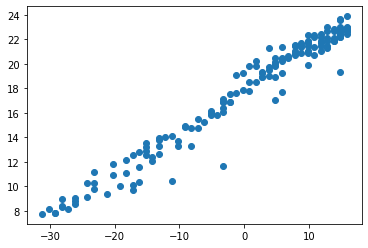

0.3351692
6/6 [==============================] - 0s 2ms/step


True

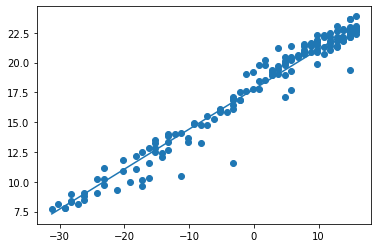

In [4]:
# regression notebook

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
col_names=['col1','col2']
data=pd.read_csv('moore.csv',header=None,names=col_names).values
Y=data[:,1]

X=data[:,0].reshape(-1,1) #converts an n dimensional array into an 2d array

Y=np.log(Y)
X=X-X.mean()
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(0.0001,0.9),loss='mse')

def schedule(epoch,lr):
  if epoch>=  50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
r=model.fit(X,Y,epochs=200,callbacks=[scheduler])

# plt.plot(r.history['loss'],label='loss')

plt.scatter(X,Y)
plt.show()

print(model.layers)
print(model.layers[0].get_weights()[0][0,0])
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

w,b=model.layers[0].get_weights()
X=X.reshape(-1,1)
Yhat2 = (X.dot(w)+b).flatten()
np.allclose(Yhat,Yhat2)